# Brain Age Prediction BayessianRidge

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:
from sklearn.linear_model import BayesianRidge
from base_regressor import BaseRegressor

from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class BayesianRidgeRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="BayesianRidge"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = BayesianRidge
        if params is None:
            self.params = {
                'alpha_1': 1e-6,
                'alpha_2': 1e-6,
                'lambda_1': 1e-6,
                'lambda_2': 1e-6,
                'tol': 1e-3
            }
        if params_space is None:
            self.params_space = {
                'alpha_1': Real(1e-6, 1e-3, prior='log-uniform'),
                'alpha_2': Real(1e-6, 1e-3, prior='log-uniform'),
                'lambda_1': Real(1e-6, 1e-3, prior='log-uniform'),
                'lambda_2': Real(1e-6, 1e-3, prior='log-uniform'),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = BayesianRidgeRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'yellow'
nameset = 'BayessianRidge'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [10]:
with open(f'results_model/opt_model.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [6]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

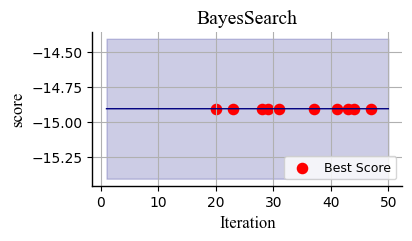

Top 1: Iteration 20, Score -14.906213868935392
Top 2: Iteration 47, Score -14.90621402262519
Top 3: Iteration 43, Score -14.906214137163829
Top 4: Iteration 41, Score -14.906214151347223
Top 5: Iteration 23, Score -14.906214184665396
Top 6: Iteration 31, Score -14.906214220166868
Top 7: Iteration 44, Score -14.906214364652858
Top 8: Iteration 37, Score -14.906214447700245
Top 9: Iteration 28, Score -14.906214466386652
Top 10: Iteration 29, Score -14.906215351398538


In [7]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [8]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha_1': 0.0008544184915534377,
  'alpha_2': 3.02350509747446e-06,
  'lambda_1': 1.314149477458906e-06,
  'lambda_2': 0.0009949411094333064,
  'tol': 1.7674648390317305e-05},
 {'alpha_1': 0.0004930493956567977,
  'alpha_2': 1.1584812620854116e-06,
  'lambda_1': 1.1252335347950627e-06,
  'lambda_2': 0.000998319023595523,
  'tol': 0.0001225089046775204},
 {'alpha_1': 5.6860883043427694e-05,
  'alpha_2': 1.5972988294614815e-05,
  'lambda_1': 2.114613357995367e-06,
  'lambda_2': 0.0009900328892684604,
  'tol': 1.781546417759831e-05},
 {'alpha_1': 1.630577041157589e-06,
  'alpha_2': 1.2592121927075437e-06,
  'lambda_1': 6.112397710865283e-06,
  'lambda_2': 0.0009987816287293646,
  'tol': 1.1930255325758426e-05},
 {'alpha_1': 1.0267857606392962e-05,
  'alpha_2': 0.0007454824512874426,
  'lambda_1': 1.0915220828162989e-06,
  'lambda_2': 0.000995847708536476,
  'tol': 0.00017219315504525589},
 {'alpha_1': 0.0005793080731505369,
  'alpha_2': 4.792675816883152e-06,
  'lambda_1': 2.3606036963

In [9]:
best_params=opt_model.best_params_

# Training

In [10]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [15]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [16]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [11]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

In [13]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

# Crear listas para almacenar las métricas de cada fold
mae_list = []
mae_corrected_list = []
r2_list = []
r2_corrected_list = []

# Iterar sobre cada DataFrame en la lista
for df in results_per_fold_CN_test:
    # Calcular MAE y R2 para y_pred
    mae = mean_absolute_error(df['y_labels'], df['y_pred'])
    r2 = r2_score(df['y_labels'], df['y_pred'])
    
    # Calcular MAE y R2 para y_pred_corrected
    mae_corrected = mean_absolute_error(df['y_labels'], df['y_pred_corrected'])
    r2_corrected = r2_score(df['y_labels'], df['y_pred_corrected'])
    
    # Agregar los valores a las listas
    mae_list.append(mae)
    mae_corrected_list.append(mae_corrected)
    r2_list.append(r2)
    r2_corrected_list.append(r2_corrected)

# Crear un DataFrame con los resultados
metrics_df = pd.DataFrame({
    'Fold': range(1, len(results_per_fold_CN_test) + 1),
    'MAE': mae_list,
    'MAE_corrected': mae_corrected_list,
    'R2': r2_list,
    'R2_corrected': r2_corrected_list
})

# Mostrar las primeras filas del DataFrame de métricas
print(metrics_df.head())


   Fold        MAE  MAE_corrected        R2  R2_corrected
0     1  14.613196       7.475243  0.272736      0.772797
1     2  13.924335       7.179004  0.339372      0.768535
2     3  16.492342       7.625416  0.176855      0.805815
3     4  15.636660       6.809900  0.209380      0.825003
4     5  16.037994       8.755637  0.099900      0.688205


In [14]:
output_file = "results/metrics_results_per_fold.xlsx"
metrics_df.to_excel(output_file, index=False, engine='openpyxl')

In [17]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_ID', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_results = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')


In [18]:
df_CN_results.to_excel('results/df_CN_results.xlsx', index=False)

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     484.0
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.19e-91
Time:                        20:28:28   Log-Likelihood:                -4812.1
No. Observations:                1323   AIC:                             9628.
Df Residuals:                    1321   BIC:                             9639.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7299      0.639     54.389      0.0

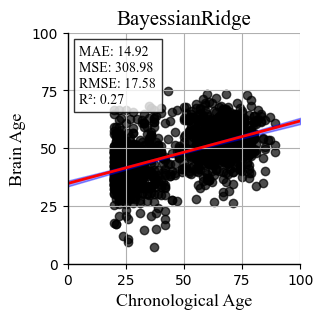

Error medio absoluto: 14.923414561185265
Error cuadrático medio: 308.9829321777588
Raíz del error cuadrático medio: 17.577910347301206
Coeficiente de determinación (R²): 0.2681276960009089


In [19]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

                            OLS Regression Results                            
Dep. Variable:       y_pred_corrected   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     6342.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        20:28:42   Log-Likelihood:                -4813.3
No. Observations:                1323   AIC:                             9631.
Df Residuals:                    1321   BIC:                             9641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8981      0.639      1.405      0.1

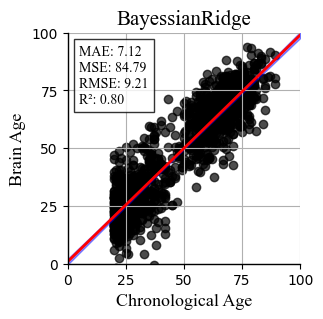

Error medio absoluto: 7.116859364295702
Error cuadrático medio: 84.79157950499837
Raíz del error cuadrático medio: 9.208234331564242
Coeficiente de determinación (R²): 0.7991584576705877


In [20]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred_corrected'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [21]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_CING_left: 2957.9564274598083
IAF_OCC_right: 2858.222793513363
Low_subj_spec_RPD_CING_right: 2506.7739892460027
Low_subj_spec_EPP_PARIET_left: 2470.194718188827
IAF_OCC_left: 2469.2058018113585
TF_MFG_right: 2090.8201215342374
Low_subj_spec_EPP_OCC_right: 1800.9664801927277
IAF_INS_right: 1791.38384610762
Low_subj_spec_RPD_OCC_left: 1711.8746459959457
Low_subj_spec_RPD_PARIET_left: 1671.3800500154111
Low_subj_spec_EPP_HPC_left: 1593.646771787462
Low_subj_spec_EPP_OCC_left: 1507.6725218437223
Low_subj_spec_EPP_HPC_right: 1376.4511664753666
High_subj_spec_RPD_CING_right: 1371.8116266122556
High_subj_spec_EPP_CING_right: 1371.8116266120155
Alpha2_canon_EPP_OCC_left: 1284.1589088608184
Alpha2_canon_RPD_OCC_left: 1284.1589088606527
IAF_IFG_right: 1259.456644577362
TF_INS_left: 1196.5655991872866
Low_subj_spec_EPP_PARIET_right: 1153.2167339280359
Alpha2_canon_RPD_CING_right: 1144.9598774696267
IAF_ORB_right: 108

In [22]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/multiple_shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_avg_CN, f)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('Low_subj_spec_EPP_CING_left', 2957.9564274598083),
 ('IAF_OCC_right', 2858.222793513363),
 ('Low_subj_spec_RPD_CING_right', 2506.7739892460027),
 ('Low_subj_spec_EPP_PARIET_left', 2470.194718188827),
 ('IAF_OCC_left', 2469.2058018113585),
 ('TF_MFG_right', 2090.8201215342374),
 ('Low_subj_spec_EPP_OCC_right', 1800.9664801927277),
 ('IAF_INS_right', 1791.38384610762),
 ('Low_subj_spec_RPD_OCC_left', 1711.8746459959457),
 ('Low_subj_spec_RPD_PARIET_left', 1671.3800500154111),
 ('Low_subj_spec_EPP_HPC_left', 1593.646771787462),
 ('Low_subj_spec_EPP_OCC_left', 1507.6725218437223),
 ('Low_subj_spec_EPP_HPC_right', 1376.4511664753666),
 ('High_subj_spec_RPD_CING_right', 1371.8116266122556),
 ('High_subj_spec_EPP_CING_right', 1371.8116266120155),
 ('Alpha2_canon_EPP_OCC_left', 1284.1589088608184),
 ('Alpha2_canon_RPD_OCC_left', 1284.1589088606527),
 ('IAF_IFG_right', 1259.456644577362),
 ('TF_INS_left', 1196.5655991872866),
 ('Low_subj_spec_EPP_PARIET_right', 1153.2167339280359),
 ('Alpha2

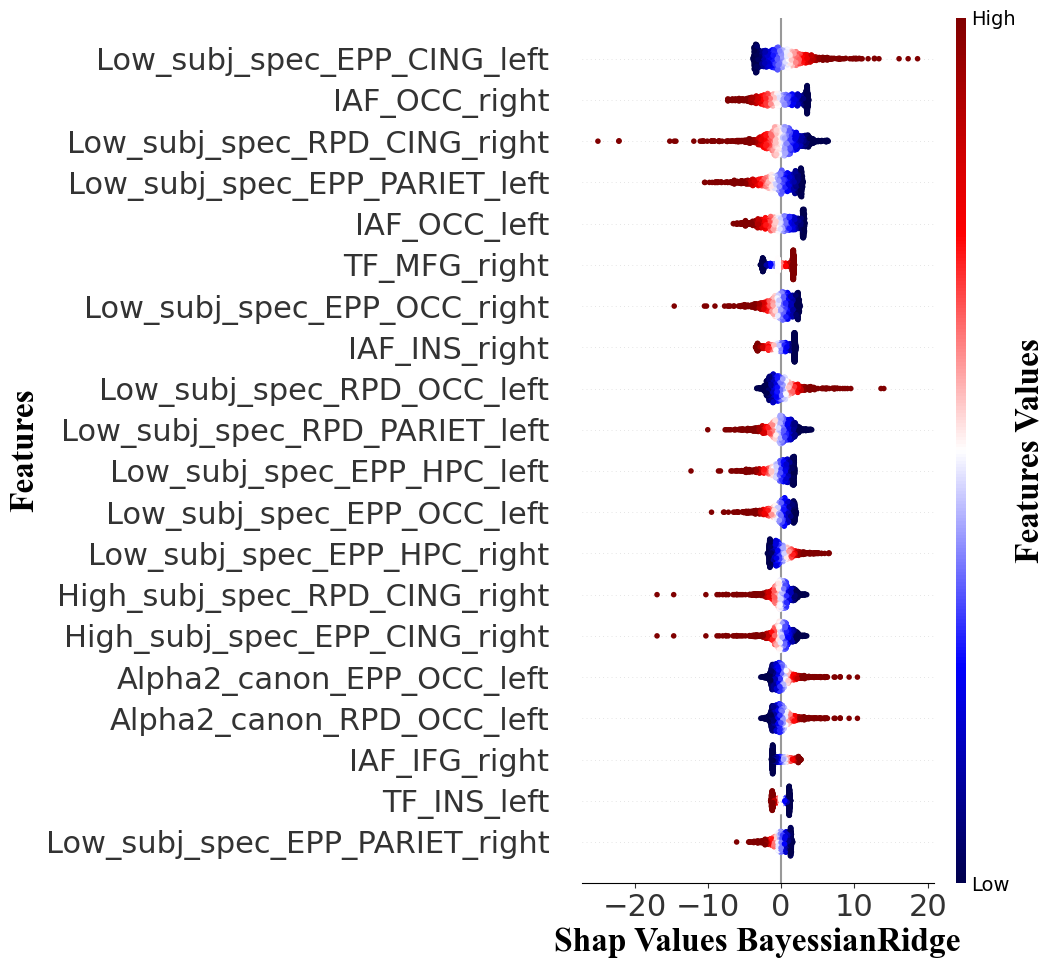

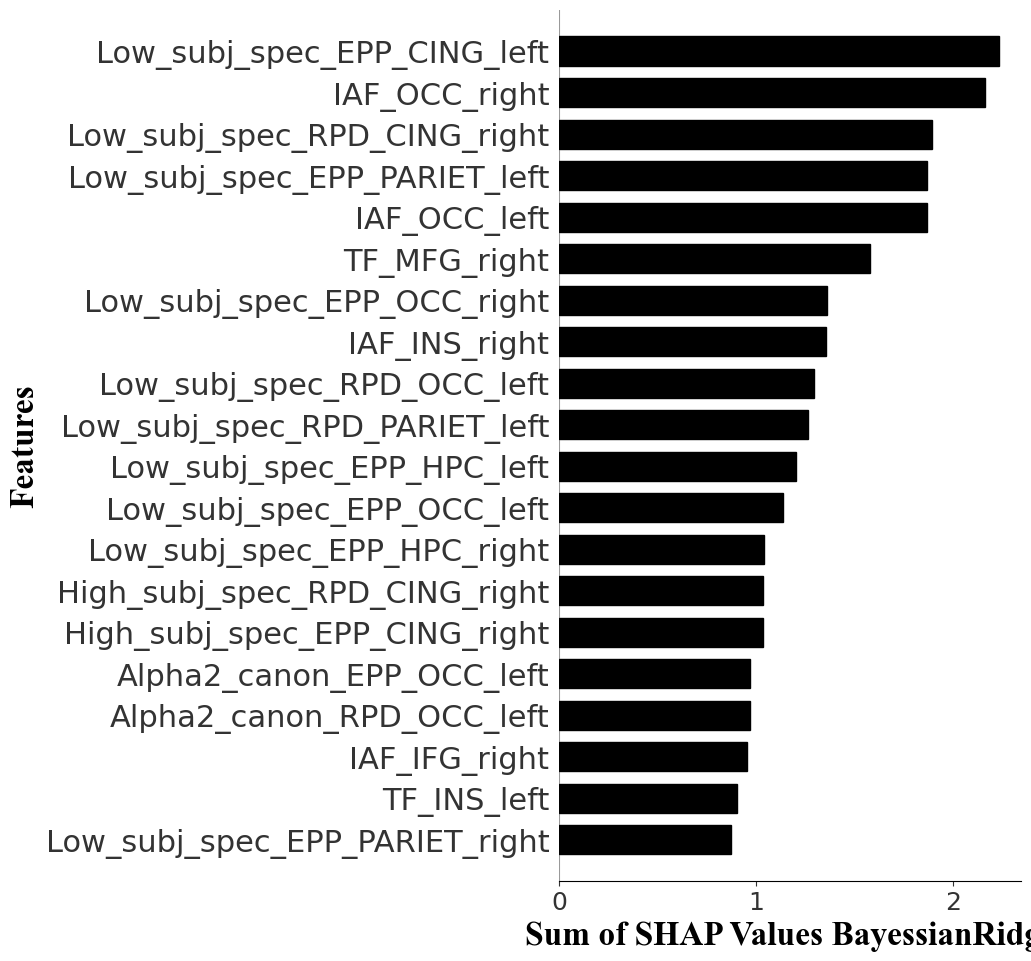

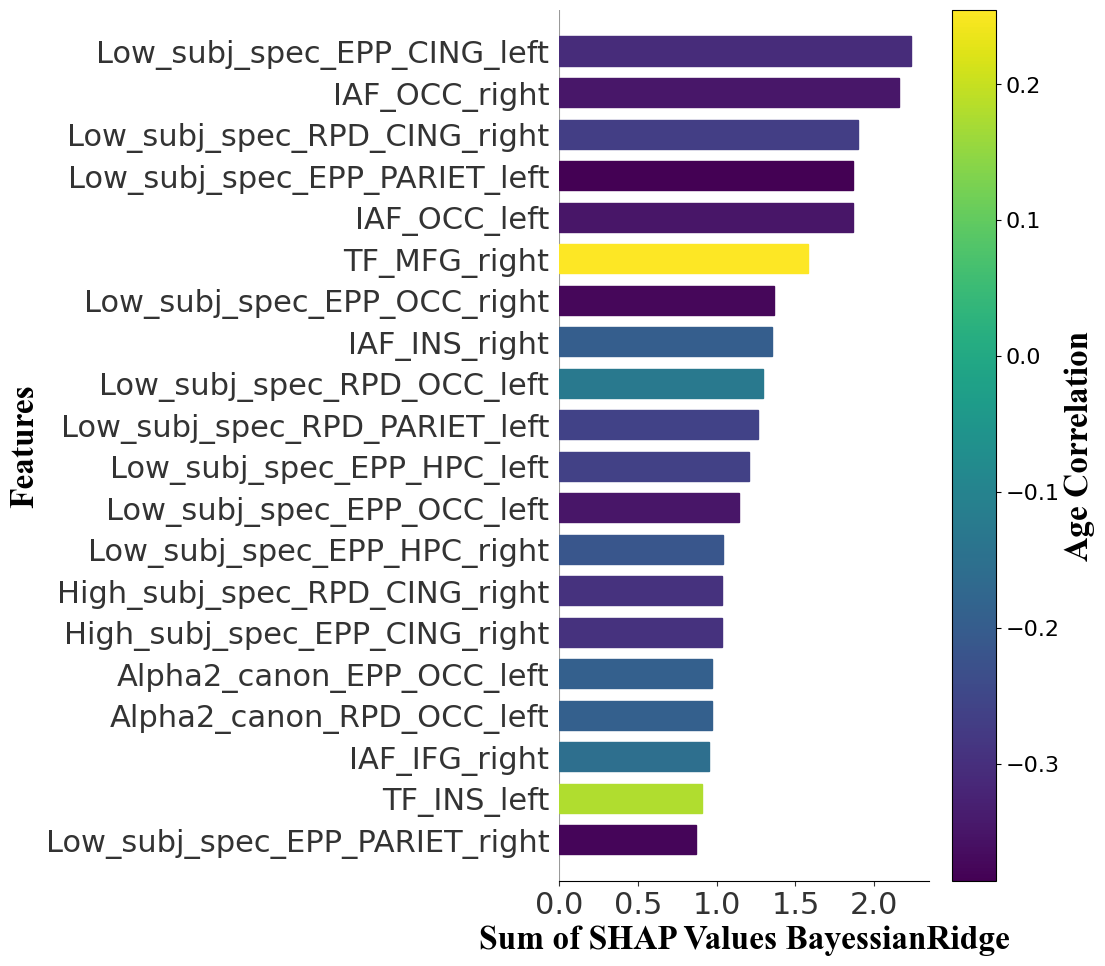

In [24]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

OCC_right: 1.000000
OCC_left: 0.897384
PARIET_left: 0.888905
CING_left: 0.634865
CING_right: 0.538028
MFG_right: 0.448752
INS_right: 0.384484


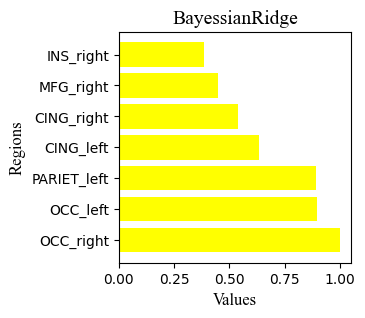

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


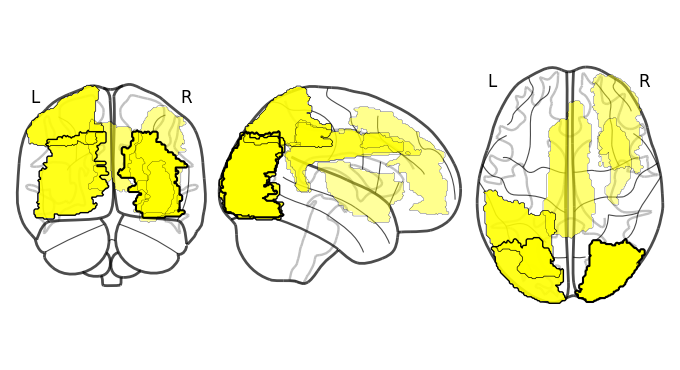

In [10]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)